<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/Seccion_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data_raw = pd.read_csv('/content/drive/MyDrive/MOD. Y SIST. INTELIGENTES/SECCION_4.csv')
data_raw.head()

,flight_date,pax_weight_kg_qty,crew_bags_gross_weight_kg_qty,pax_bags_gross_weight_kg_qty,cargo_gross_weight_kg_qty,maximum_payload_kg_qty
0,2025-04-20,25118.0,0,2233,526,17316
1,2025-04-04,9056.0,0,593,0,19848
2,2025-04-16,20168.0,0,1284,360,12728
3,2025-05-08,13318.0,0,1536,217,17828
4,2025-04-12,23716.0,0,1516,0,15614


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142754 entries, 0 to 142753
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   flight_date                    142754 non-null  object 
 1   pax_weight_kg_qty              142705 non-null  float64
 2   crew_bags_gross_weight_kg_qty  142754 non-null  int64  
 3   pax_bags_gross_weight_kg_qty   142754 non-null  int64  
 4   cargo_gross_weight_kg_qty      142754 non-null  int64  
 5   maximum_payload_kg_qty         142754 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 6.5+ MB


In [4]:
data_raw = data_raw.drop('flight_date', axis=1)
data_raw.head()
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142754 entries, 0 to 142753
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   pax_weight_kg_qty              142705 non-null  float64
 1   crew_bags_gross_weight_kg_qty  142754 non-null  int64  
 2   pax_bags_gross_weight_kg_qty   142754 non-null  int64  
 3   cargo_gross_weight_kg_qty      142754 non-null  int64  
 4   maximum_payload_kg_qty         142754 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 5.4 MB


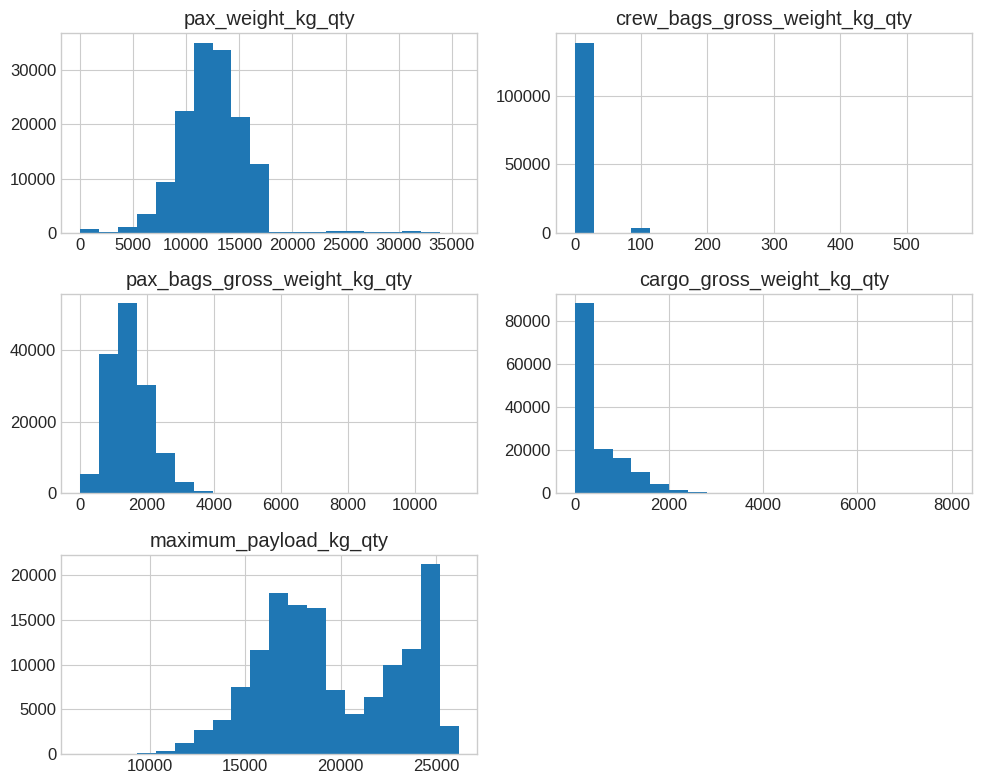

In [5]:
data_raw.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

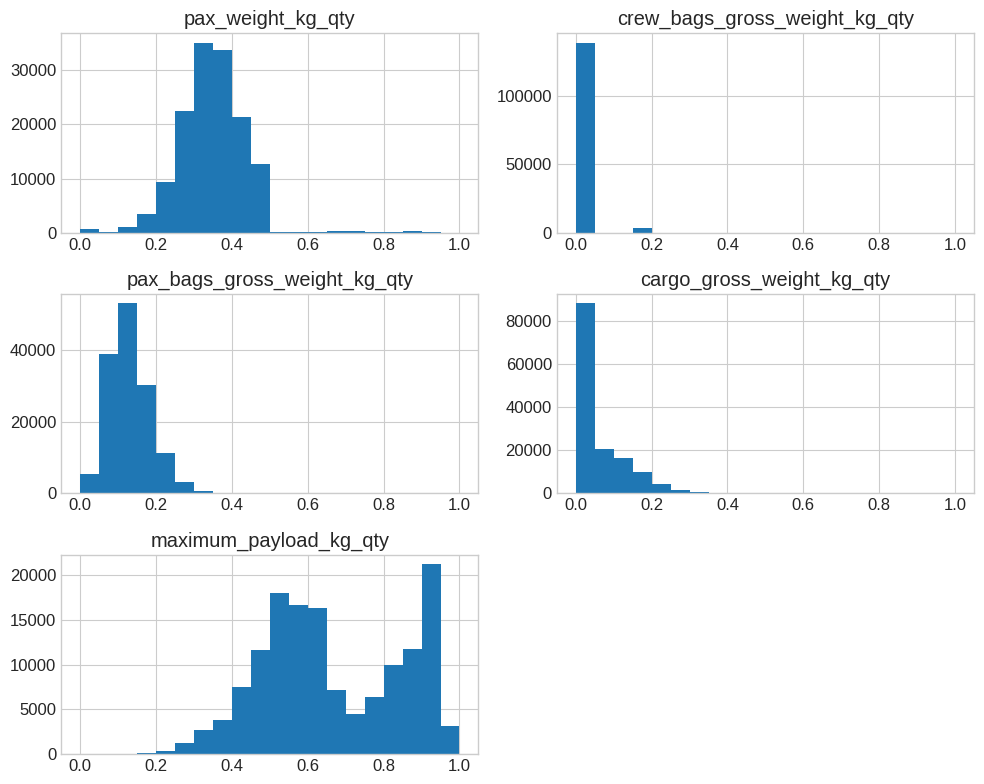

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_raw)
data_normalized = pd.DataFrame(data_normalized, columns=data_raw.columns)
data_normalized.head()
data_normalized.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [7]:
data_normalized.head()

,pax_weight_kg_qty,crew_bags_gross_weight_kg_qty,pax_bags_gross_weight_kg_qty,cargo_gross_weight_kg_qty,maximum_payload_kg_qty
0,0.704730,0.0,0.197436,0.065504,0.552846
1,0.254082,0.0,0.052431,0.000000,0.680705
2,0.565849,0.0,0.113528,0.044832,0.321163
3,0.373660,0.0,0.135809,0.027024,0.578700
4,0.665395,0.0,0.134041,0.000000,0.466899


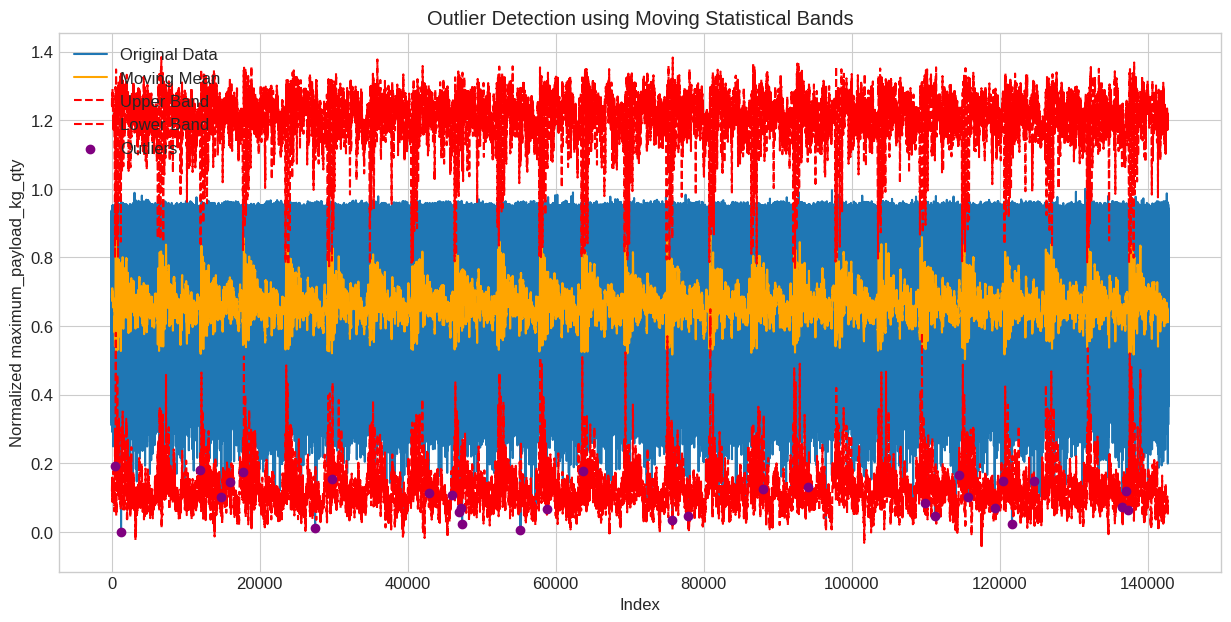

Detected Outliers:
        maximum_payload_kg_qty  moving_mean  upper_band  lower_band
496                   0.191183     0.582935    0.971788    0.194082
1288                  0.000000     0.604476    1.104692    0.104260
12011                 0.180023     0.535739    0.848339    0.223139
14836                 0.100894     0.669875    1.228382    0.111367
15991                 0.145937     0.739036    1.309412    0.168660
17793                 0.173459     0.571577    0.936193    0.206961
27500                 0.011665     0.634861    1.183376    0.086346
29771                 0.154775     0.532444    0.875361    0.189528
42819                 0.114175     0.673378    1.218448    0.128308
45961                 0.107307     0.644201    1.148129    0.140274
46929                 0.057466     0.599348    1.127898    0.070797
47206                 0.068424     0.613428    1.122401    0.104454
47356                 0.023582     0.612351    1.115784    0.108919
55240                 0.00540

In [8]:
def detect_outliers_moving_bands(data, column, window_size=30, std_multiplier=2):
    """
    Detects outliers using moving statistical bands.

    Args:
        data (pd.DataFrame): The input DataFrame.
        column (str): The column to detect outliers in.
        window_size (int): The size of the moving window.
        std_multiplier (int): The multiplier for the standard deviation to set the band width.

    Returns:
        pd.DataFrame: The DataFrame with an added 'is_outlier' column.
    """
    data['moving_mean'] = data[column].rolling(window=window_size, center=True).mean()
    data['moving_std'] = data[column].rolling(window=window_size, center=True).std()

    data['upper_band'] = data['moving_mean'] + std_multiplier * data['moving_std']
    data['lower_band'] = data['moving_mean'] - std_multiplier * data['moving_std']


    data['is_outlier'] = ((data[column] > data['upper_band']) | (data[column] < data['lower_band'])).astype(int)

    return data


data_normalized = detect_outliers_moving_bands(data_normalized, 'maximum_payload_kg_qty', window_size=100, std_multiplier=3)


plt.figure(figsize=(15, 7))
plt.plot(data_normalized.index, data_normalized['maximum_payload_kg_qty'], label='Original Data')
plt.plot(data_normalized.index, data_normalized['moving_mean'], label='Moving Mean', color='orange')
plt.plot(data_normalized.index, data_normalized['upper_band'], label='Upper Band', color='red', linestyle='--')
plt.plot(data_normalized.index, data_normalized['lower_band'], label='Lower Band', color='red', linestyle='--')
plt.scatter(data_normalized[data_normalized['is_outlier'] == 1].index,
            data_normalized[data_normalized['is_outlier'] == 1]['maximum_payload_kg_qty'],
            color='purple', label='Outliers', zorder=5)
plt.title('Outlier Detection using Moving Statistical Bands')
plt.xlabel('Index')
plt.ylabel('Normalized maximum_payload_kg_qty')
plt.legend()
plt.show()


outliers = data_normalized[data_normalized['is_outlier'] == 1]
print("Detected Outliers:")
print(outliers[['maximum_payload_kg_qty', 'moving_mean', 'upper_band', 'lower_band']])


In [9]:
data_cleaned = data_normalized[data_normalized['is_outlier'] == 0].copy()
data_cleaned = data_cleaned.drop(columns=['moving_mean', 'moving_std', 'upper_band', 'lower_band', 'is_outlier'])

print("\nData after removing outliers (data_cleaned):")
print(data_cleaned.head())
print("\nInfo of data_cleaned:")
data_cleaned.info()


Data after removing outliers (data_cleaned):
   pax_weight_kg_qty  crew_bags_gross_weight_kg_qty  \
0           0.704730                            0.0   
1           0.254082                            0.0   
2           0.565849                            0.0   
3           0.373660                            0.0   
4           0.665395                            0.0   

   pax_bags_gross_weight_kg_qty  cargo_gross_weight_kg_qty  \
0                      0.197436                   0.065504   
1                      0.052431                   0.000000   
2                      0.113528                   0.044832   
3                      0.135809                   0.027024   
4                      0.134041                   0.000000   

   maximum_payload_kg_qty  
0                0.552846  
1                0.680705  
2                0.321163  
3                0.578700  
4                0.466899  

Info of data_cleaned:
<class 'pandas.core.frame.DataFrame'>
Index: 142723 entries

In [10]:
data_cleaned.dropna(subset=['pax_weight_kg_qty'], inplace=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142674 entries, 0 to 142753
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   pax_weight_kg_qty              142674 non-null  float64
 1   crew_bags_gross_weight_kg_qty  142674 non-null  float64
 2   pax_bags_gross_weight_kg_qty   142674 non-null  float64
 3   cargo_gross_weight_kg_qty      142674 non-null  float64
 4   maximum_payload_kg_qty         142674 non-null  float64
dtypes: float64(5)
memory usage: 6.5 MB


In [11]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop('maximum_payload_kg_qty', axis=1)
y = data_cleaned['maximum_payload_kg_qty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (114139, 4)
Shape of X_test: (28535, 4)
Shape of y_train: (114139,)
Shape of y_test: (28535,)


Mean Squared Error (MSE): 0.03808861926021761
Root Mean Squared Error (RMSE): 0.19516305813400653
R-squared (R2) Score: -0.10322879639122351


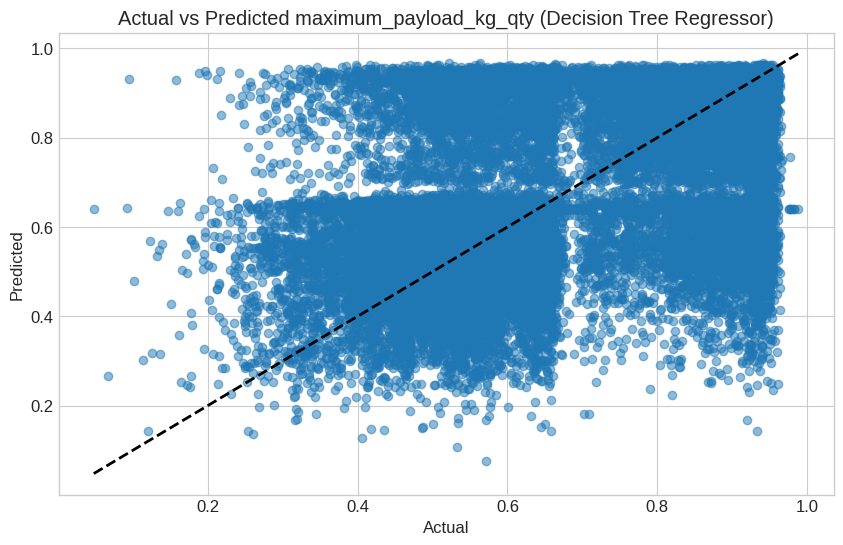

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

cart_regressor = DecisionTreeRegressor(random_state=42)

cart_regressor.fit(X_train, y_train)

y_pred = cart_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted maximum_payload_kg_qty (Decision Tree Regressor)")
plt.show()


In [13]:
model_A = cart_regressor

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2854/2854 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.0380 - val_loss: 0.0201
Epoch 2/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0203 - val_loss: 0.0198
Epoch 3/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 0.0201 - val_loss: 0.0197
Epoch 4/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0197 - val_loss: 0.0196
Epoch 5/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0195 - val_loss: 0.0195
Epoch 6/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0194 - val_loss: 0.0196
Epoch 7/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0195 - val_loss: 0.0194
Epoch 8/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0195 - val_loss: 0.0207
Epoch 9/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0194 - val_loss: 0.0195
Epoch 10/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0194 - val_loss: 0.0198
Epoch 11/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0193 - val_loss: 0.0195
Epoch 12/100
2854/2854 ━━━━━

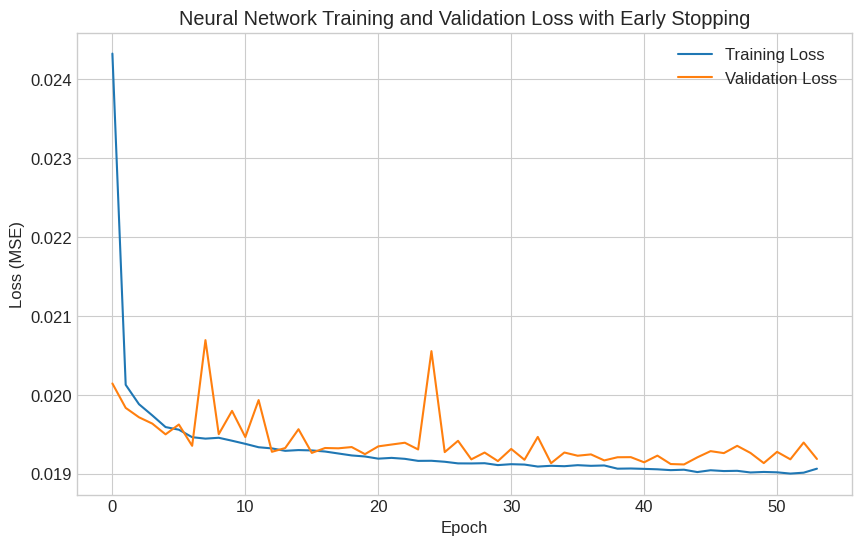

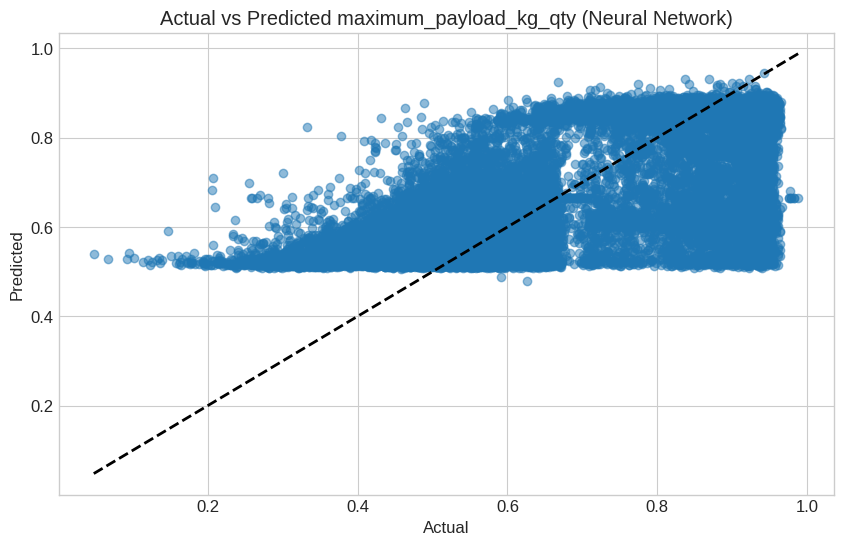


Interpretación de los resultados de la Red Neuronal:

Mean Squared Error (MSE) en datos de prueba: 0.0187

R-squared (R2) Score en datos de prueba: 0.4584


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


model_nn = Sequential([

    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),

    Dense(64, activation='relu'),

    Dense(1)
])


model_nn.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_nn.fit(X_train, y_train,
                       validation_split=0.2,
                       epochs=100,
                       batch_size=32,
                       callbacks=[early_stopping],
                       verbose=1)


loss = model_nn.evaluate(X_test, y_test, verbose=0)
print(f"\nMean Squared Error (MSE) on Test Data (Neural Network): {loss:.4f}")


y_pred_nn = model_nn.predict(X_test)


r2_nn = r2_score(y_test, y_pred_nn)
print(f"R-squared (R2) Score on Test Data (Neural Network): {r2_nn:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training and Validation Loss with Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted maximum_payload_kg_qty (Neural Network)")
plt.show()

print("\nInterpretación de los resultados de la Red Neuronal:")
print(f"\nMean Squared Error (MSE) en datos de prueba: {loss:.4f}")

print(f"\nR-squared (R2) Score en datos de prueba: {r2_nn:.4f}")


In [15]:
model_B = model_nn

In [18]:
!pip install deap

import random
from deap import base, creator, tools, algorithms
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

SEARCH_SPACE = {
    'n_neurons_layer1': [32],
    'n_neurons_layer2': [32],
    'learning_rate': np.logspace(5),
    'batch_size': [16],
    'es_patience': [5]
}


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))


creator.create("Individual", list, fitness=creator.FitnessMin)


toolbox = base.Toolbox()


def generate_hyperparameter(param_name):
    return random.choice(SEARCH_SPACE[param_name])

toolbox.register("individual", tools.initCycle, creator.Individual, (
    lambda: generate_hyperparameter('n_neurons_layer1'),
    lambda: generate_hyperparameter('n_neurons_layer2'),
    lambda: generate_hyperparameter('learning_rate'),
    lambda: generate_hyperparameter('batch_size'),
    lambda: generate_hyperparameter('es_patience')
), n=1)


toolbox.register("population", tools.initRepeat, list, toolbox.individual)


def evaluate_neural_network(individual, X_train, y_train, X_test, y_test):
    n_neurons_layer1, n_neurons_layer2, learning_rate, batch_size, es_patience = individual

    n_neurons_layer1 = int(n_neurons_layer1)
    n_neurons_layer2 = int(n_neurons_layer2)
    batch_size = int(batch_size)
    es_patience = int(es_patience)

    model_nn = Sequential([
        Dense(n_neurons_layer1, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(n_neurons_layer2, activation='relu'),
        Dense(1)
    ])


    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model_nn.compile(optimizer=optimizer, loss='mean_squared_error')


    early_stopping = EarlyStopping(monitor='val_loss', patience=es_patience, restore_best_weights=True, verbose=0)

    try:
        history = model_nn.fit(X_train, y_train,
                               validation_split=0.2,
                               epochs=30,
                               batch_size=batch_size,
                               callbacks=[early_stopping],
                               verbose=0)
    except Exception as e:
        print(f"Error durante el entrenamiento para el individuo {individual}: {e}")

        return (float('inf'),)


    loss = model_nn.evaluate(X_test, y_test, verbose=0)


    return (loss,)


toolbox.register("evaluate", evaluate_neural_network,
                 X_train=X_train, y_train=y_train,
                 X_test=X_test, y_test=y_test)

toolbox.register("mate", tools.cxTwoPoint)



def mutate_hyperparameter(individual, indpb, search_space):

    for i in range(len(individual)):
        if random.random() < indpb:
            param_name = list(search_space.keys())[i]
            individual[i] = random.choice(search_space[param_name])
    return individual,

toolbox.register("mutate", mutate_hyperparameter, indpb=0.2, search_space=SEARCH_SPACE)

toolbox.register("select", tools.selTournament, tournsize=3)


population_size = 20
num_generations = 10
prob_crossover = 0.7
prob_mutation = 0.3

population = toolbox.population(n=population_size)

print("Evaluando población inicial...")
fitnesses = map(toolbox.evaluate, population)
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)


hof = tools.HallofFame(1)

print("\nIniciando algoritmo genético...")
population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=prob_crossover,
                                        mutpb=prob_mutation,
                                        ngen=num_generations,
                                        stats=stats,
                                        halloffame=hof,
                                        verbose=True)

print("\nAlgoritmo genético finalizado.")


print("\nMejor individuo encontrado:")
best_individual = hof[0]
print(f"Hiperparámetros: {best_individual}")
print(f"MSE (Aptitud): {best_individual.fitness.values[0]}")

print("\nRe-entrenando el mejor modelo...")
final_model = Sequential([
    Dense(int(best_individual[0]), input_shape=(X_train.shape[1],), activation='relu'),
    Dense(int(best_individual[1]), activation='relu'),
    Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=best_individual[2])
final_model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=int(best_individual[4]), restore_best_weights=True, verbose=0)

history_final = final_model.fit(X_train, y_train,
                                validation_split=0.2,
                                epochs=50,
                                batch_size=int(best_individual[3]),
                                callbacks=[early_stopping],
                                verbose=1)

final_loss = final_model.evaluate(X_test, y_test, verbose=0)
y_pred_final = final_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred_final)

print(f"\nMétricas del mejor modelo en el conjunto de prueba:")
print(f"Mean Squared Error (MSE): {final_loss:.4f}")
print(f"R-squared (R2) Score: {final_r2:.4f}")


import matplotlib.pyplot as plt
gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")
plt.figure(figsize=(10, 6))
plt.plot(gen, avg, label="Average Fitness")
plt.plot(gen, min_, label="Minimum Fitness (Best)")
plt.plot(gen, max_, label="Maximum Fitness")
plt.xlabel("Generation")
plt.ylabel("MSE (Fitness)")
plt.title("Evolution of Fitness (MSE) over Generations")
plt.legend()
plt.show()


TypeError: logspace() missing 1 required positional argument: 'stop'

In [17]:
# prompt: Ahora con los modelos A, B y EL modelo OPTIMIZADO,  por favor ejecuta un modelo de ensable con Gradient Boosting; para tener el mejor resultado y llamalo ensamble

from sklearn.ensemble import GradientBoostingRegressor

# Entrenar el modelo OPTIMIZADO (el mejor modelo encontrado por el AG)
model_OPTIMIZADO = final_model

# Predecir con cada modelo en el conjunto de prueba
y_pred_A = model_A.predict(X_test)
y_pred_B = model_B.predict(X_test)
y_pred_OPTIMIZADO = model_OPTIMIZADO.predict(X_test).flatten() # Las predicciones de NN suelen tener forma (n, 1), necesitamos (n,)

# Combinar las predicciones de los modelos como features para el ensamble
# Es importante que todas las predicciones tengan la misma forma
ensemble_X_train = np.column_stack((model_A.predict(X_train), model_B.predict(X_train).flatten(), model_OPTIMIZADO.predict(X_train).flatten()))
ensemble_X_test = np.column_stack((y_pred_A, y_pred_B.flatten(), y_pred_OPTIMIZADO))


# Entrenar el modelo de ensamble con Gradient Boosting
# Puedes ajustar los hiperparámetros de GradientBoostingRegressor para mejorar el rendimiento
ensamble = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo de ensamble con las predicciones de los modelos base como features
ensamble.fit(ensemble_X_train, y_train)

# Realizar predicciones con el modelo de ensamble
y_pred_ensamble = ensamble.predict(ensemble_X_test)

# Evaluar el rendimiento del ensamble
mse_ensamble = mean_squared_error(y_test, y_pred_ensamble)
rmse_ensamble = np.sqrt(mse_ensamble)
r2_ensamble = r2_score(y_test, y_pred_ensamble)

print("\nMétricas del modelo de Ensamble (Gradient Boosting):")
print(f"Mean Squared Error (MSE): {mse_ensamble:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ensamble:.4f}")
print(f"R-squared (R2) Score: {r2_ensamble:.4f}")

# Visualizar las predicciones del ensamble vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ensamble, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted (Ensemble)")
plt.title("Actual vs Predicted maximum_payload_kg_qty (Ensemble - Gradient Boosting)")
plt.show()


NameError: name 'final_model' is not defined